In [1519]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import GlobalPhaseGate
from qiskit.circuit import Qubit
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np

In [1520]:
qa = QuantumRegister(3, 'a')
qb = QuantumRegister(3, 'b')
aux = QuantumRegister(1, 'aux')
z = QuantumRegister(1, 'z')
cr = ClassicalRegister(3, 'c')
qc = QuantumCircuit(qa, qb, aux, z, cr)

qaRegs = qa[:]
qbRegs = qb[:]

# Creating the Quantum Table

In [1521]:

# qc.x(qa[2])
# qc.h(qa)
# qc.mcx(qa, qb[2])
# qc.ccx(qa[0], qa[2], qb[2])
# qc.cx(qa[1], qb[2])
# qc.x(qb[2])

# qc.ccx(qa[1], qa[2], qb[1])
# qc.ccx(qa[0], qa[2], qb[1])
# qc.cx(qa[2], qb[1])
# qc.cx(qa[1], qb[1])
# qc.cx(qa[0], qb[1])
# qc.x(qb[1])

# qc.mcx(qa, qb[0])
# qc.ccx(qa[0], qa[2], qb[0])
# qc.ccx(qa[0], qa[1], qb[0])
# qc.cx(qa[1], qb[0])
# qc.cx(qa[0], qb[0])
# qc.x(qb[0])

# qc.draw(output='mpl')
# qc.measure(qb, cr)
# backend = Aer.get_backend('qasm_simulator')
# job = execute(qc, backend, shots=8192)
# result = job.result()
# counts = result.get_counts()
# plot_histogram(counts)

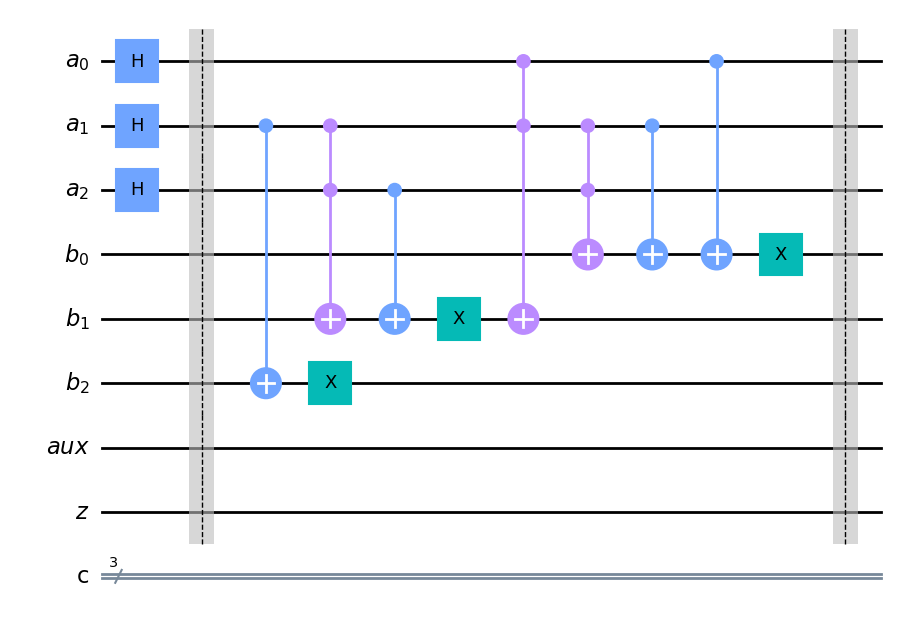

In [1522]:
qc.h(qa)
qc.barrier()

qc.cx(qa[1], qb[2])
qc.x(qb[2])

qc.ccx(qa[1], qa[2], qb[1])
qc.cx(qa[2], qb[1])
qc.x(qb[1])
qc.ccx(qa[0], qa[1], qb[1])

qc.ccx(qa[1], qa[2], qb[0])
qc.cx(qa[1], qb[0])
qc.cx(qa[0], qb[0])
qc.x(qb[0])
qc.barrier()


qc.draw(output='mpl')

## Performing a search (SELECT query)

In [1523]:
def search(num):
    M = int(np.floor(np.pi/4 * np.sqrt(2**len(qa))))
    binary = bin(num)[2:]
    binary = '0'*(len(qa)-len(binary)) + binary
    print(binary)
    # qc.add_register(z)
    # qc.x(z)
    qc.h(z)
    qc.z(z)
    # qc.p(np.pi, z)
    qc.barrier()
    for i in range(M):
        for j in range(len(binary)):
            if binary[j] == '0':
                qc.x(qbRegs[j])
        # qc.x(qb[2])
        # qc.x(qbRegs[1])
        # qc.x(qbRegs[0])
        qc.mcx(qbRegs, aux)
        for j in range(len(binary)):
            if binary[j] == '0':
                qc.x(qbRegs[j])
        # qc.x(qb[2])
        # qc.x(qbRegs[1])
        # qc.x(qbRegs[0])
        qc.barrier()
        qc.cx(aux, z)
        qc.cx(aux, qaRegs)
        # qc.ch(aux, qaRegs)
        qc.h(qaRegs)
        qc.x(qaRegs)
        qc.mcx(qaRegs, z)
        qc.x(qaRegs)
        qc.h(qaRegs)
        # qc.ch(z, qa)
        qc.z(qaRegs[len(qaRegs)-1])
        qc.x(qaRegs[len(qaRegs)-1])
        qc.z(qaRegs[len(qaRegs)-1])
        qc.x(qaRegs[len(qaRegs)-1])
        qc.barrier()

    # qc.h(qa)
    qc.x(qaRegs)
    qc.measure(qa, cr)
    qc.draw(output='mpl')
    # backend = Aer.get_backend('qasm_simulator')
    # job = execute(qc, backend, shots=1024)
    # result = job.result()
    # counts = result.get_counts()
    # print(counts)
    # plot_histogram(counts)
    # return max(counts, key=counts.get)[::-1]
    # qc.remove_register(z)

# search(4)


100
{'001': 130, '000': 147, '010': 114, '101': 123, '111': 118, '011': 256, '110': 136}


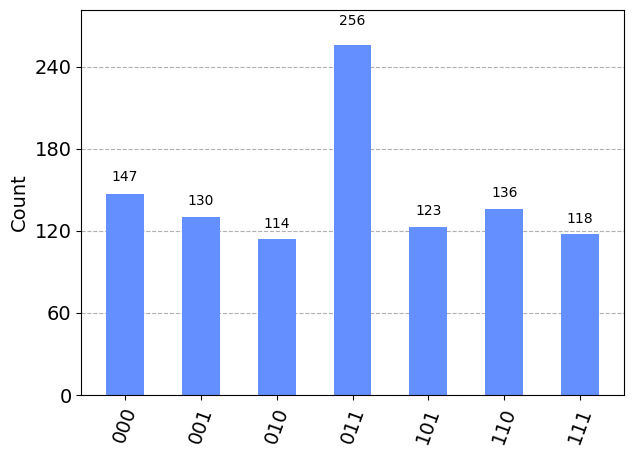

In [1524]:
# Let's search for qb = 4, should get 101 (5) as output
search(4)

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)


## Performing an Insert (INSERT query)

/home/sum/Documents/QuantumDB/QuantumDB/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


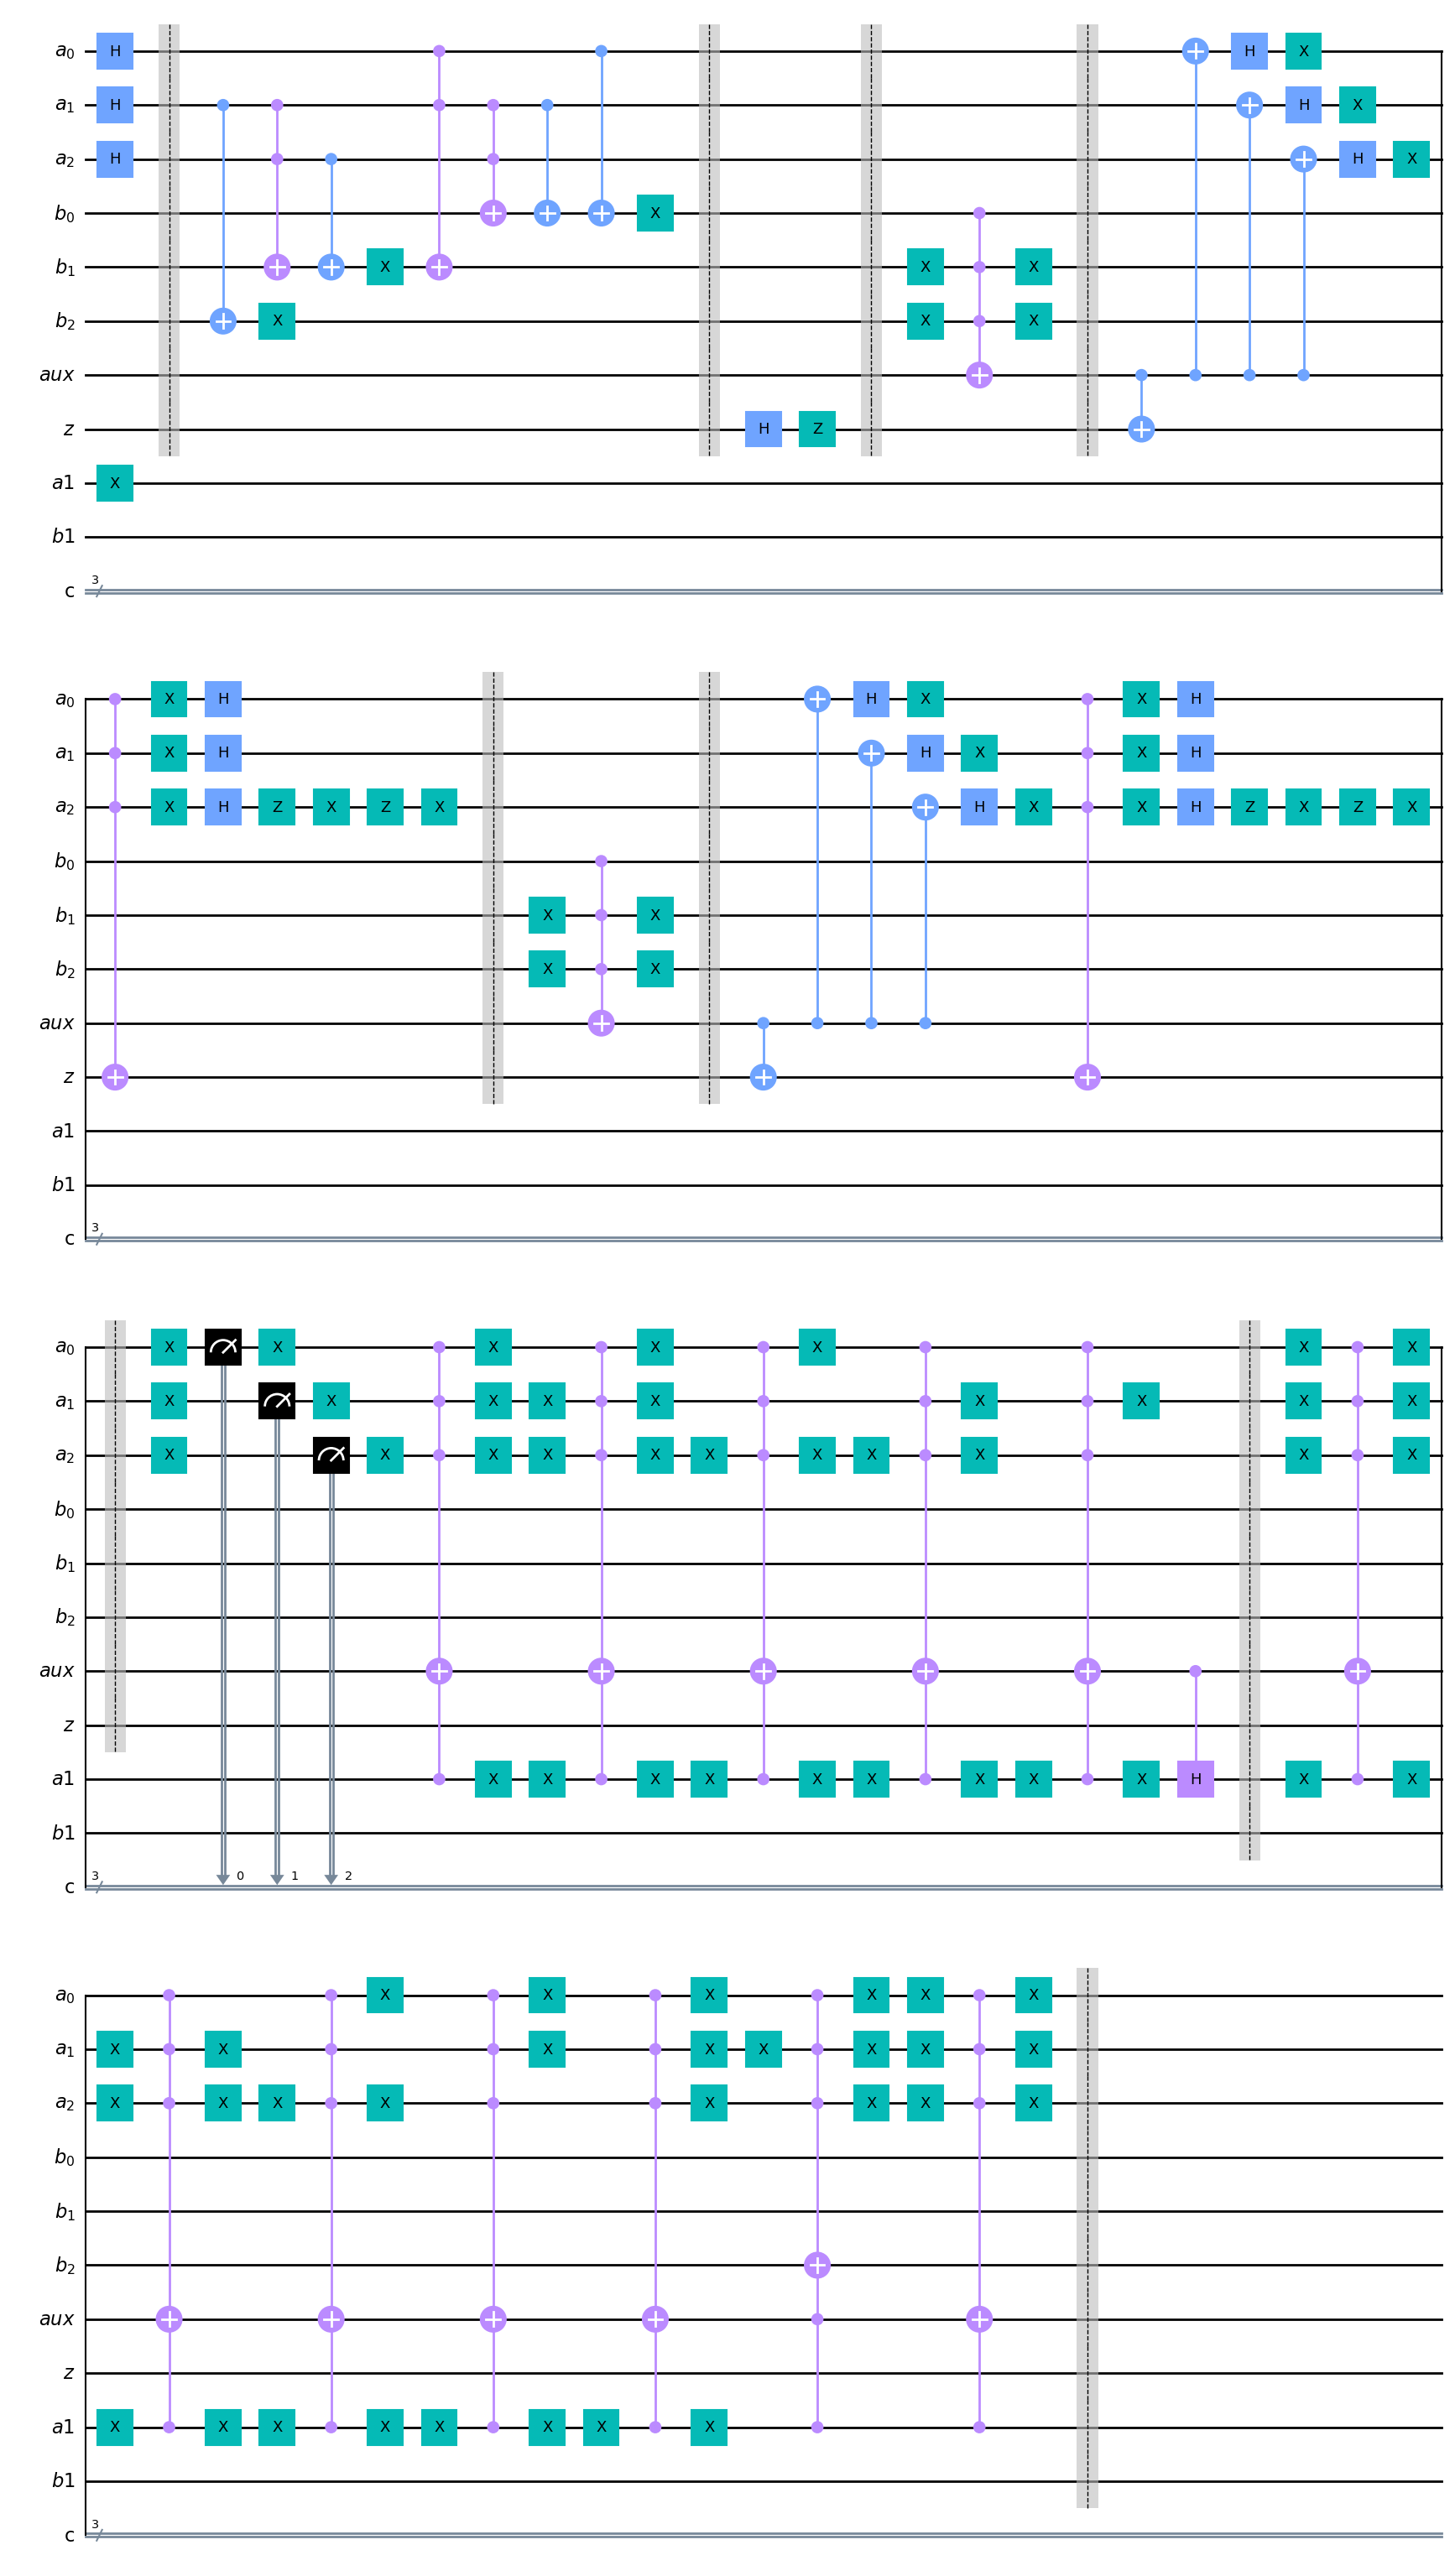

In [1525]:
# Inserting 8 into table
qa1 = QuantumRegister(1, 'a1')
qb1 = QuantumRegister(1, 'b1')
qc.add_register(qa1)
qc.add_register(qb1)
qaRegs += qa1[:]
qbRegs += qb1[:]
# Stage 1: Controlling on prev states
qc.x(qaRegs)
qc.mcx(qaRegs, aux)
qc.x(qaRegs)

qc.x(qaRegs[1:])
qc.mcx(qaRegs, aux)
qc.x(qaRegs[1:])

qc.x(qaRegs[2:] + [qaRegs[0]])
qc.mcx(qaRegs, aux)
qc.x(qaRegs[2:] + [qaRegs[0]])

qc.x(qaRegs[2:])
qc.mcx(qaRegs, aux)
qc.x(qaRegs[2:])

qc.x([qaRegs[1], qaRegs[3]])
qc.mcx(qaRegs, aux)
qc.x([qaRegs[1], qaRegs[3]])

qc.ch(aux, qaRegs[3])
qc.barrier()

# Stage 2
qc.x(qaRegs)
qc.mcx(qaRegs, aux)
qc.x(qaRegs)

qc.x(qaRegs[1:])
qc.mcx(qaRegs, aux)
qc.x(qaRegs[1:])

qc.x(qaRegs[2:])
qc.mcx(qaRegs, aux)
qc.x(qaRegs[2:])

qc.x(qaRegs[0:1] + [qaRegs[3]])
qc.mcx(qaRegs, aux)
qc.x(qaRegs[0:1] + [qaRegs[3]])

qc.x([qaRegs[1], qaRegs[3]])
qc.mcx(qaRegs, aux)
qc.x([qaRegs[1], qaRegs[3]])

# Stage 3
qc.x(qaRegs[0:3])
qc.mcx(qaRegs + [aux], qb[2])
qc.x(qaRegs[0:3])

# Stage 4: Resetting aux
# qc.x(qaRegs[0:2])
qc.x(qaRegs[0:3])
qc.mcx(qaRegs, aux)
qc.x(qaRegs[0:3])
qc.barrier()

qc.draw(output='mpl')



000
None


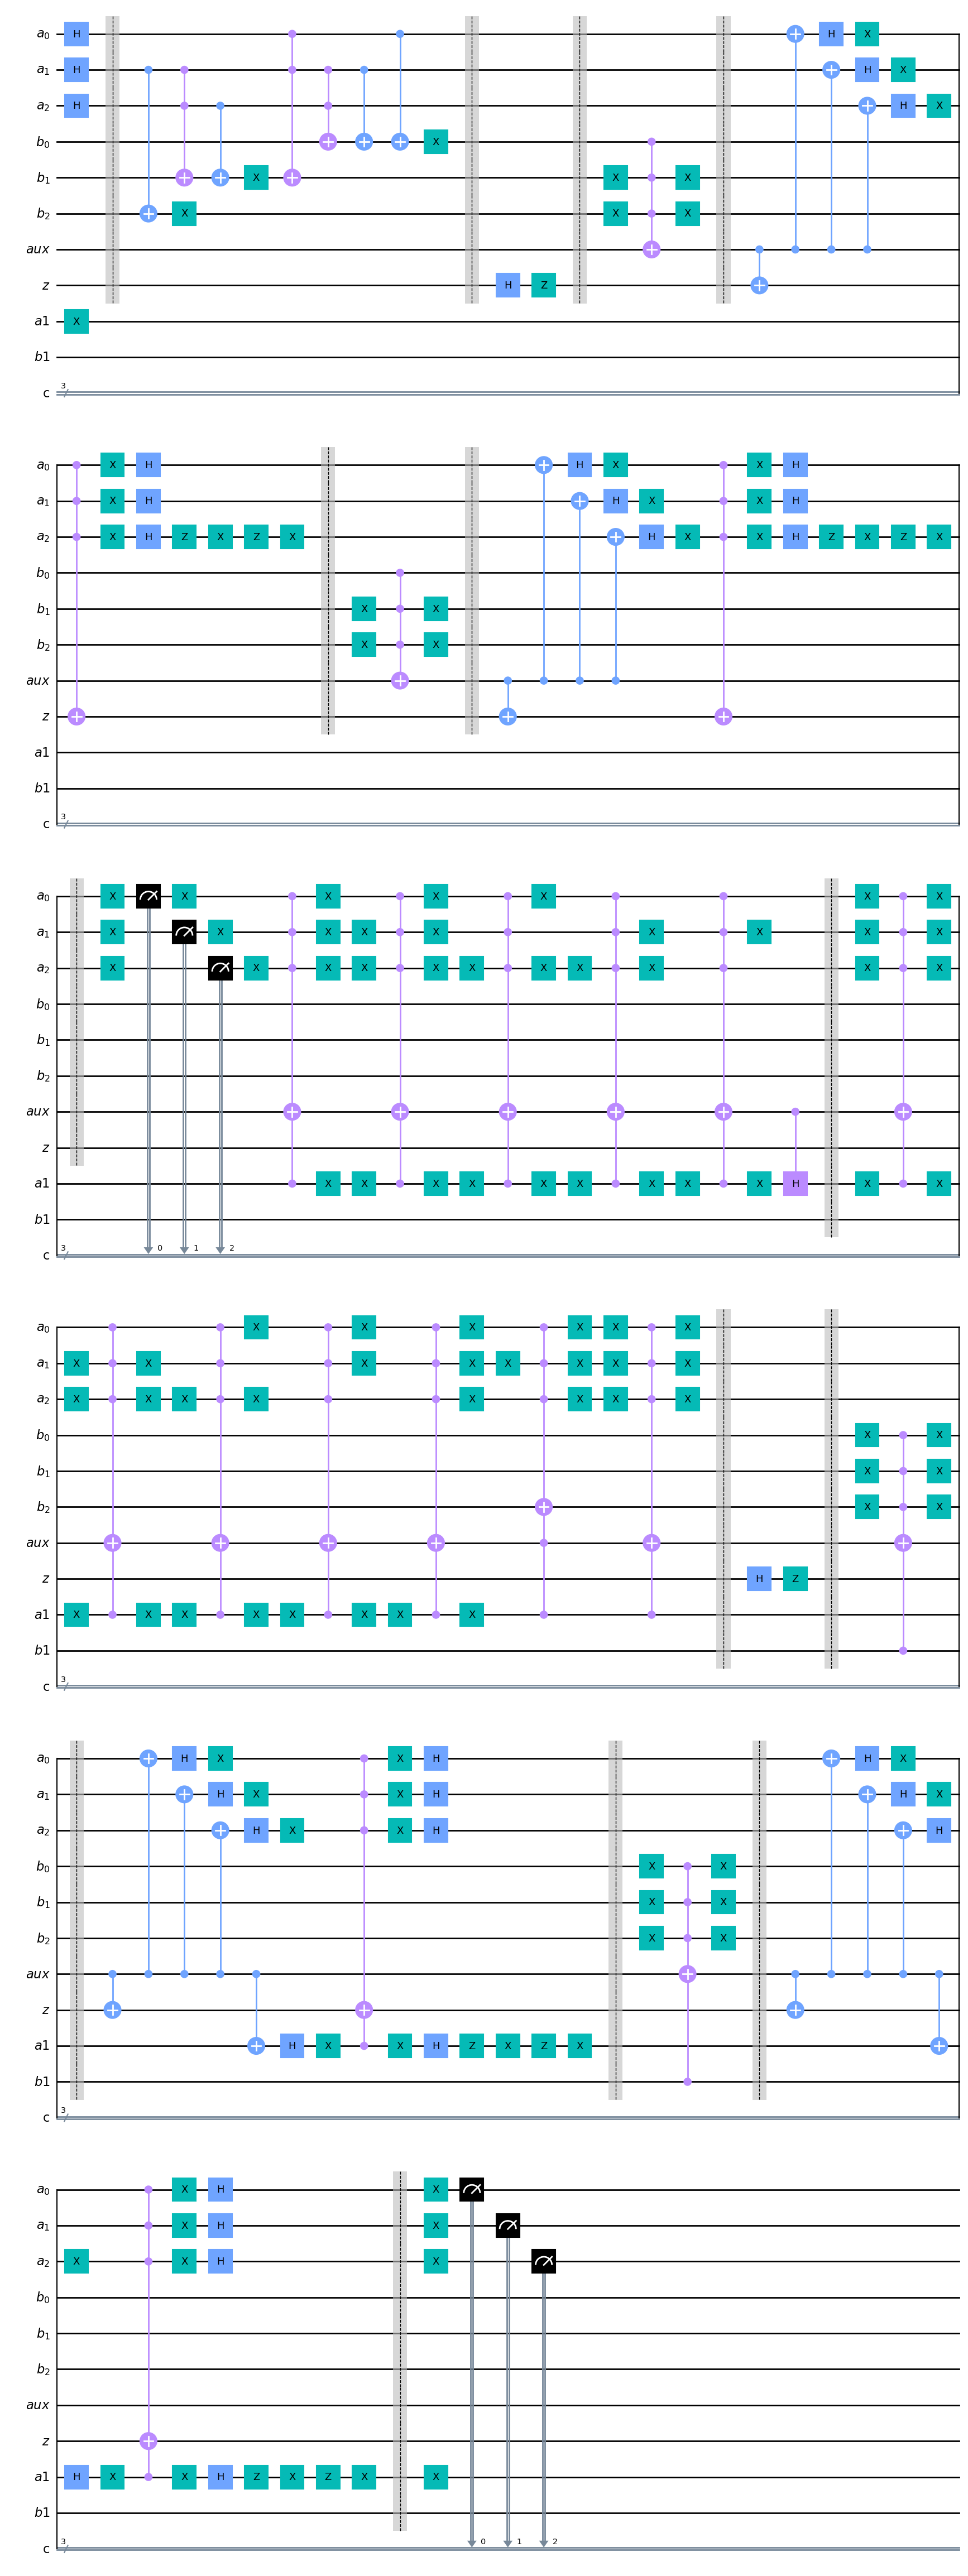

In [1526]:
print(search(0))
qc.draw(output='mpl')
# print("Key: ", int(search(0), 2))

## Creating a new Table

In [1527]:
c = QuantumRegister(2, 'c')
d = QuantumRegister(2, 'd')
e = QuantumRegister(3, 'e')
t2 = QuantumCircuit(c, d, e)

t2.h(c)
t2.cx(c[1], d[1])
t2.cx(c[0], d[1])
t2.x(d[1])
